In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
import cv2
%matplotlib inline

In [2]:
ls model

 Volume in drive C has no label.
 Volume Serial Number is EE70-5BF2

 Directory of C:\Users\hp\Desktop\placements\gender_prediction\model

24-07-2021  11:35    <DIR>          .
24-07-2021  11:35    <DIR>          ..
23-07-2021  11:51    <DIR>          .ipynb_checkpoints
23-07-2021  11:51           930,126 haarcascade_frontalface_default.xml
24-07-2021  13:18            80,159 mean_preprocess.pickle
24-07-2021  11:35         2,665,827 model_svm.pickle
24-07-2021  13:13         4,082,046 pca_50.pickle
               4 File(s)      7,758,158 bytes
               3 Dir(s)  91,463,180,288 bytes free


In [3]:
# load the model
haar=cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
#pickle files
mean=pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm=pickle.load(open('./model/model_svm.pickle','rb'))
model_pca=pickle.load(open('./model/pca_50.pickle','rb'))
print('model loaded sucessfully')

model loaded sucessfully


In [4]:
mean.shape

(10000,)

In [5]:
gender_predict=['Male','Female']
font=cv2.FONT_HERSHEY_SIMPLEX

In [19]:
def pipline_model(img,color='rgb'):
    # step-2 :convert into gray scale
    if color=='bgr':
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #step-3 :crop the face (using haarcascade classifier)
    faces=haar.detectMultiScale(gray,1.3,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)  #drawing rectangle
        roi=gray[y:y+h,x:x+w]  #crop image
        #step-4 normalization(0-1)
        roi=roi/255.0
        #step-5 resize the image
        size=roi.shape[0]*roi.shape[1]
        if size>=10000:  #shrink
                roi_resize=cv2.resize(roi,(100,100),cv2.INTER_AREA) # SHRINK
        else: #enlarge
                roi_resize=cv2.resize(roi,(100,100),cv2.INTER_CUBIC)  #Enlarge
        #step-6: flatting image(1X10000)
        roi_reshape=roi_resize.reshape(1,10000) #1,-1
        #step-7 substract with mean
        roi_mean=roi_reshape-mean
        #step=8 get eigen image
        eigen_image=model_pca.transform(roi_mean)
        #step- 9 pass to ml model
        results=model_svm.predict_proba(eigen_image)[0]
        #step-10
        predict=results.argmax()  #0 or 1
        score=results[predict]
        # step-11
        text="%s: %0.2f"%(gender_predict[predict],score)
        cv2.putText(img,text,(x,y),font,2,(255,0,0),2)
    return img

In [7]:
model_pca

PCA(n_components=50, whiten=True)

In [8]:
from PIL import Image  #it is very fast to read an image

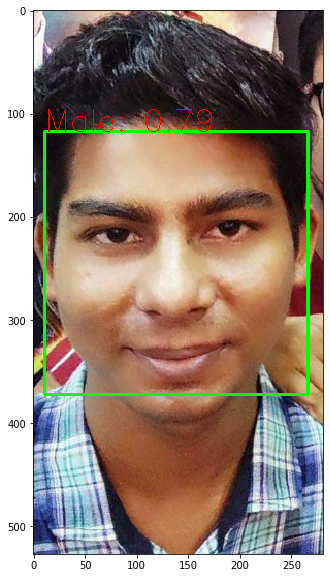

In [9]:
# test data
plt.figure(figsize=(10,10))
test_data_path='./data/test_img.jpeg'
color='bgr'
#step-1 :read image
img=Image.open(test_data_path)
#step -2 convert into array
img=np.array(img)
# step-3 pass to pipline model
img=pipline_model(img)
plt.imshow(img)
#cv2.imshow('gender prediction',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.show()

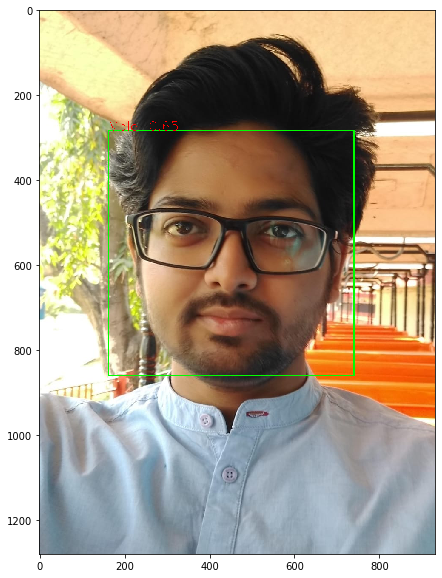

In [10]:
plt.figure(figsize=(10,10))
test_data_path='./data/ashar_img.jpeg'
color='bgr'
#step-1 :read image
img=Image.open(test_data_path)
#step -2 convert into array
img=np.array(img)
# step-3 pass to pipline model
img=pipline_model(img)
#cv2.imshow('gender prediction',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

# Apply pipline to video

In [152]:
cap=cv2.VideoCapture('./data/video.mp4')
while True:
    ret,frame=cap.read()
    if ret==False:
        break
    frame=pipline_model(frame,color='bgr')
    cv2.imshow('Gender detector',frame)
    if cv2.waitKey(20)==27: #esc key
        break
cv2.destroyAllWindows()
cap.release()

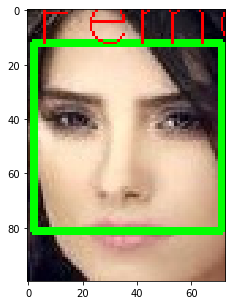

In [11]:
plt.figure(figsize=(10,5))
test_data_path='./data/112944.jpg'
color='bgr'
#step-1 :read image
img=Image.open(test_data_path)
#step -2 convert into array
img=np.array(img)
# step-3 pass to pipline model
img=pipline_model(img)
#cv2.imshow('gender prediction',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

In [14]:
plt.figure(figsize=(10,5))
test_data_path='./data/aatif.jpeg'
color='bgr'
#step-1 :read image
img=Image.open(test_data_path)
#step -2 convert into array
img=np.array(img)
# step-3 pass to pipline model
img=pipline_model(img)
cv2.imshow('gender prediction',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.imshow(img)
#plt.show()

<Figure size 720x360 with 0 Axes>

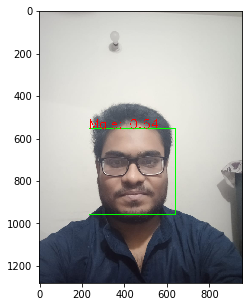

In [21]:
plt.figure(figsize=(10,5))
test_data_path='./data/adnan.jpeg'
color='bgr'
#step-1 :read image
img=Image.open(test_data_path)
#step -2 convert into array
img=np.array(img)
# step-3 pass to pipline model
img=pipline_model(img)
cv2.imshow('gender prediction',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img)
plt.show()